<a href="https://colab.research.google.com/github/aezazueta/Clasificador_CancionPorGenero/blob/main/Clasificador_CancionPorGenero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de las librerías relevantes (inicialmente) para el proyecto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sb

!pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 


Carga y análisis exploratorio del dataframe 

In [ ]:
dfMusic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DBs/cleaned.csv')
dfMusic.head(10)

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548
5,171,Rock,0.698278,0.285816,0.213494,0.955691,0.087036,0.064094,125.645,0.150599
6,172,Rock,0.815549,0.144125,0.892721,0.900430,0.104703,0.102294,138.680,0.034916
7,173,Rock,0.842113,0.285293,0.564689,0.951624,0.110481,0.040611,166.552,0.254299
8,174,Rock,0.367393,0.339698,0.846639,0.909186,0.198944,0.462607,70.887,0.048243
9,175,Rock,0.993928,0.310090,0.952493,0.274311,0.354231,0.825744,69.413,0.033402


Revisión superficial de los datos estadísticos del dataframe puesto que se asume que ya vienen limpios.

In [ ]:
dfMusic.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


Comprobación de datos no nulos, cantidad y tipos de datos

In [ ]:
dfMusic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [ ]:
print('Cantidad de filas: ', dfMusic.shape[0], '\n')
print('Cantidad de columnas: ', dfMusic.shape[1])


Cantidad de filas:  4802 

Cantidad de columnas:  10


Análisis de la clase a predecir, donde se detecta que hay un desbalance de clase, lo que podría ocasionar un sesgo en el proceso de generalización de la informacío y entrenamiento.

In [ ]:
dfMusic.groupby('genre_top').size()

genre_top
Hip-Hop     910
Rock       3892
dtype: int64

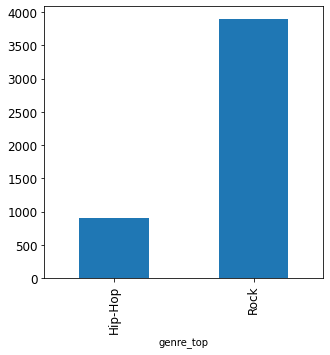

In [ ]:
dfMusic.groupby('genre_top').size().plot(kind= 'bar', fontsize= 12, figsize= (5,5))
plt.show()

Se prosigue a revisar los histogramas y combinaciones de variables para tratar de identificar alguna relación o patrón relevante para el proyecto, no se detectó nada importante.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efca3148210>,
      dtype=object)

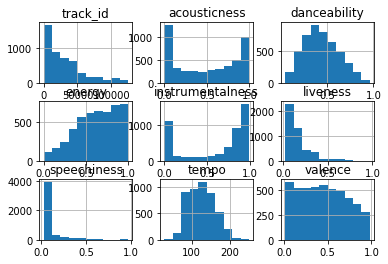

In [ ]:
dfMusic.hist()

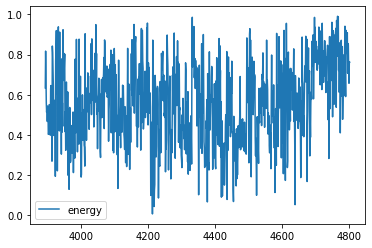

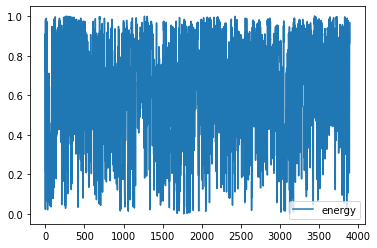

In [ ]:
dfMusic.loc[:, ['genre_top', 'energy']].groupby('genre_top').plot()
plt.show()

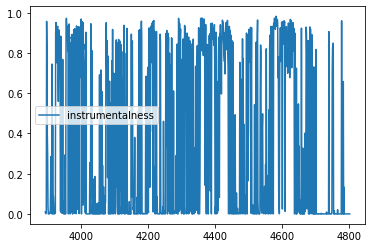

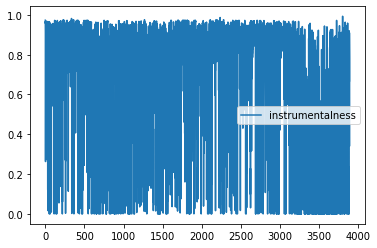

In [ ]:
dfMusic.loc[:, ['genre_top', 'instrumentalness']].groupby('genre_top').plot()
plt.show()

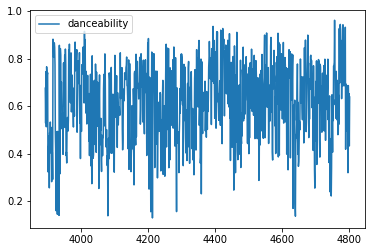

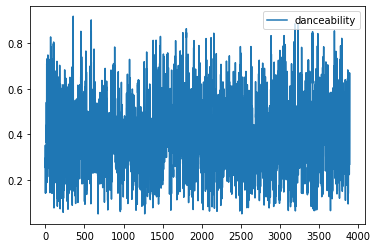

In [ ]:
dfMusic.loc[:, ['genre_top', 'danceability']].groupby('genre_top').plot()
plt.show()

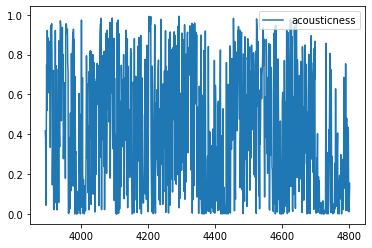

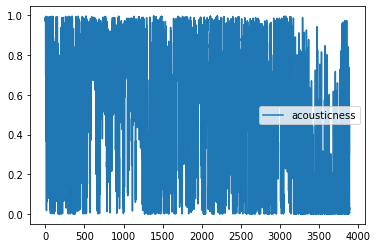

In [ ]:
dfMusic.loc[:, ['genre_top', 'acousticness']].groupby('genre_top').plot()
plt.show()

Mapeo de variable dependiente 'genre_top'

Hip-hop = 0


Rock = 1

In [ ]:
#dfMusic['genre_top'] = dfMusic['genre_top'].map({'Hip-Hop' : 0, 'Rock' : 1}).astype(int)


In [ ]:
dfMusic

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,9.672940e-01,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781,97.880,0.073548
...,...,...,...,...,...,...,...,...,...,...
4797,124718,Hip-Hop,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,124719,Hip-Hop,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,124720,Hip-Hop,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,124721,Hip-Hop,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


División del dataset en bloques tanto de variables dependientes e independientes como bloques de testeo y entrenamiento.

In [ ]:
y = dfMusic['genre_top']
x = dfMusic.drop(['genre_top', 'track_id'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3841 entries, 4348 to 2732
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      3841 non-null   float64
 1   danceability      3841 non-null   float64
 2   energy            3841 non-null   float64
 3   instrumentalness  3841 non-null   float64
 4   liveness          3841 non-null   float64
 5   speechiness       3841 non-null   float64
 6   tempo             3841 non-null   float64
 7   valence           3841 non-null   float64
dtypes: float64(8)
memory usage: 270.1 KB


Entrenamiento del modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Se manda llamar al constructor del arbol de desición
arbol = DecisionTreeClassifier()

#Se entrena el modelo
arbol_genero= arbol.fit(x_train, y_train)

Generación visual del arbol de desicion.

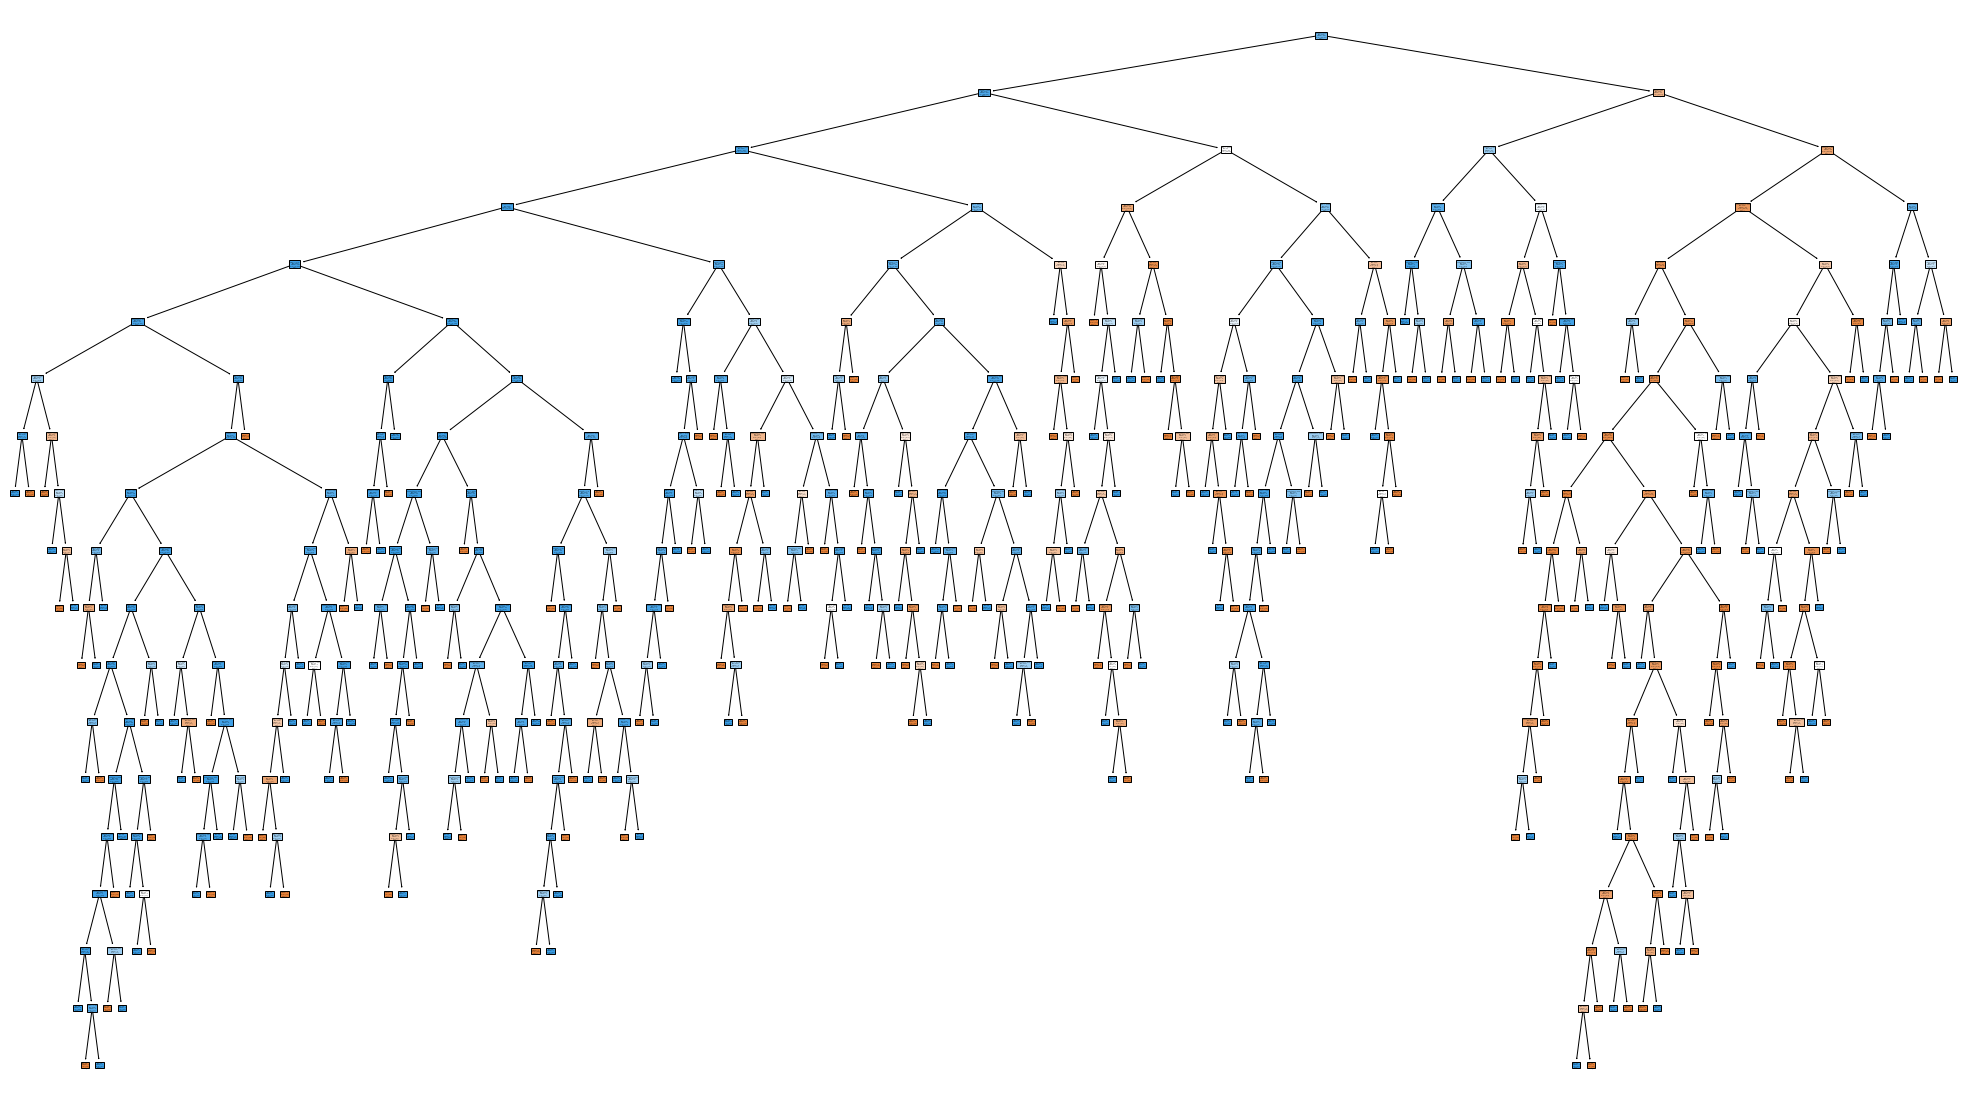

In [ ]:
fig = plt.figure(figsize= (35,20))

tree.plot_tree(arbol_genero, feature_names=list(x.columns.values),
               class_names = list(str(y.values)), filled = True)
plt.show()

In [ ]:
fig.savefig('DesitionTree.png')

Almacenamiento de valores predecidos para posterior validación.

In [ ]:
y_pred = arbol_genero.predict(x_test)
y_pred

array(['Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Hip-Hop', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Hip-Hop', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Hip-Hop',
       'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Hip-Hop', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Hip-Hop', 'Rock',
       'Hip-Hop', 'Hip-Hop', 'Rock', 'Rock', 'Hip-Hop', 'Hip-Hop', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Roc

##Creación de la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_conf = confusion_matrix(y_test, y_pred)

matriz_conf

array([[131,  49],
       [ 61, 720]])

Al hacer el cálculo de presición global se alcanza un 90% de accuracy, sin embargo al calcular la presición por clase se detecta un decremento importante en la clase Hip-Hop (75%) posiblemente por el desbalance de clases.

Calculo de la presición global del modelo

In [ ]:
global_presition = np.sum(matriz_conf.diagonal()) / np.sum(matriz_conf)
print('Presición global: ',global_presition, '%')


Presición global:  0.8855359001040582 %


Cálculo de presición por clase

In [ ]:
presition_hip = ((matriz_conf[0,0])) / sum(matriz_conf[0,])
print('Presición de predicción de Hip-hop:  ',presition_hip, '%')

Presición de predicción de Hip-hop:   0.7277777777777777 %


In [ ]:
presition_rock = ((matriz_conf[1,1])) / sum(matriz_conf[1,])
print('Presición de predicción de Rock:  ',presition_rock, '%')

Presición de predicción de Rock:   0.9218950064020487 %


Creación de la clase '**track**' para ingresar variables y generar predicciones.

In [ ]:
from pydantic import BaseModel

class track(BaseModel):
    acousticness: float 
    danceability: float 
    energy: float 
    instrumentalness: float 
    liveness: float 
    speechiness: float 
    tempo: float 
    valence: float
    class Config:
        schema_extra = {   #Ingreso de variables para predicción
            "example": {
                "acousticness": 0.838816, 
                "danceability": 0.542950, 
                "energy": 0.669215,
                "instrumentalness": 0.000006,
                "liveness": 0.105610,
                "speechiness": 0.391221,
                "tempo": 111.894,
                "valence": 0.796073
            }
        }

Serialización en archivo binario del modelo con la librería Pickle

In [ ]:
import pickle

pickle.dump(arbol_genero, open('arbol_genero.sav', 'wb'))

In [ ]:
from fastapi import FastAPI

app = FastAPI()
@app.on_event('startup')
def load_model():                           #Carga del modelo a la API
  global model
  model = pickle.load(open('arbol_genero.sav', 'rb'))

@app.get('/')
def index():
  return {'>>>>>>API en ejecución<<<<<'}    #Mesanje que se mostrará al iniciar la API

@app.post('/predict')
def get_music_category(data: track):        #Captura y asignación de variables para alimentar modelo y 
  received = data.dict()                    #obtener una predicción
  acousticness = received['acousticness']
  danceability = received['danceability']
  energy = received['energy']
  instrumentalness = received['instrumentalness']
  liveness = received['liveness']
  speechiness = received['speechiness']
  tempo = received['tempo']
  valence = received['valence']
  pred_genre = model.predict([[acousticness, danceability, energy,
                               instrumentalness, liveness, speechiness,
                               tempo, valence]]).tolist()[0]
  return{'prediction' : pred_genre}

In [ ]:
!pip install pyngrok
!pip install ngrok
!pip install uvicorn
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 6.0 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=29ebb9d84c1a1298839b66ff35aa6bf253700a3441080c717014a7c45791681e
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ngrok: filename=ngrok-0.0.1-py3-none-any.whl size=3061 sha256=0f420e7f899a506e55d65ee87911eba98bef44eb34e5611e44c0f1c0f88d34d2
  Stored in directory: /root/.cache/pip/wheels/b2/f2/1e/11e57b35a7c1ea622a4cff4d9622bebd373f6371f3b1728a00
Successfully built ngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 3.4 MB/s 
     |███████████████████

In [ ]:
! ngrok authtoken 2DGrILNutdXifRhZK2jJfBQpVqt_71eSiXzoNjHR9cbxLx3hh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok
import uvicorn
import nest_asyncio


ngrok_tunnel= ngrok.connect(8000)         #Conexión al tunel por el puerto 8000

print('Public URL', ngrok_tunnel.public_url)

nest_asyncio.apply()
uvicorn.run(app, port=8000)               

In [ ]:
from pyngrok import ngrok
import uvicorn
import nest_asyncio
ngrok.kill()                #Liberación de recursos